# Recommendations with IBM
## Exploratory Data Analysis



In this notebook, you will be putting your recommendation skills to use on real data from the IBM Watson Studio platform. 

In [1]:
!pip install -e ../

Obtaining file:///C:/Users/netxph/Projects/ibm-recommend
  Attempting uninstall: ibm-recommend
    Found existing installation: ibm-recommend 0.1.0
    Uninstalling ibm-recommend-0.1.0:
      Successfully uninstalled ibm-recommend-0.1.0
  Running setup.py develop for ibm-recommend


In [2]:
import pandas as pd
import numpy as np

from ibm_recommend import project_tests as t
from ibm_recommend.cleaning import email_mapper

%matplotlib inline

In [3]:
articles = pd.read_csv("../data/processed/articles.csv")
articles.head()

,article_id,name,description,body
0,0,Detect Malfunctioning IoT Sensors with Streami...,Detect bad readings in real time using Python ...,Skip navigation Sign in SearchLoading...\r\n\r...
1,1,Communicating data science: A guide to present...,"See the forest, see the trees. Here lies the c...",No Free Hunch Navigation * kaggle.com\r\n\r\n ...
2,2,"This Week in Data Science (April 18, 2017)",Here’s this week’s news in Data Science and Bi...,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...
3,3,DataLayer Conference: Boost the performance of...,Learn how distributed DBs solve the problem of...,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA..."
4,4,Analyze NY Restaurant data using Spark in DSX,This video demonstrates the power of IBM DataS...,Skip navigation Sign in SearchLoading...\r\n\r...


In [4]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   article_id   1051 non-null   int64 
 1   name         1051 non-null   object
 2   description  1048 non-null   object
 3   body         1037 non-null   object
dtypes: int64(1), object(3)
memory usage: 33.0+ KB


In [5]:
interactions = pd.read_csv("../data/processed/interactions.csv")
interactions.head()

,user_id,article_id,title,email
0,1,1430,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,2,1314,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,3,1429,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,4,1338,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,5,1276,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [6]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45993 entries, 0 to 45992
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     45993 non-null  int64 
 1   article_id  45993 non-null  int64 
 2   title       45993 non-null  object
 3   email       45976 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.4+ MB


### `1.` What is the distribution of how many articles a user interacts with in the dataset?  Provide a visual and descriptive statistics to assist with giving a look at the number of times each user interacts with an article.  

In [7]:
interactions.groupby("email").user_id.count().sort_values(ascending = False)

email
2b6c0f514c2f2b04ad3c4583407dccd0810469ee    364
77959baaa9895a7e2bdc9297f8b27c1b6f2cb52a    363
2f5c7feae533ce046f2cb16fb3a29fe00528ed66    170
a37adec71b667b297ed2440a9ff7dad427c7ac85    169
8510a5010a5d4c89f5b07baac6de80cd12cfaf93    160
                                           ... 
1b520f0f65c0aee52d4235f92fb2de58fa966635      1
7a67e4a2902a20062e1f2a6835b6e099b34b4f6c      1
c4b7e639e91b1d18e5b9c000f0ad3354888fcdde      1
7a7fb282789944665ffc1cddee5ddbdbd7ca9f64      1
9655144418d25a0e074616840447e6e5dbef0069      1
Name: user_id, Length: 5148, dtype: int64

<AxesSubplot:>

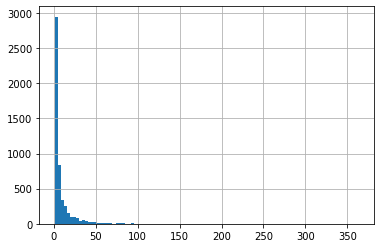

In [8]:
# non-unique interactions

interactions.groupby("email").user_id.count().hist(bins=100)

In [9]:
interactions[["email", "article_id"]].drop_duplicates().groupby("email").article_id.count().sort_values(ascending = False)

email
2b6c0f514c2f2b04ad3c4583407dccd0810469ee    135
77959baaa9895a7e2bdc9297f8b27c1b6f2cb52a    135
d9032ff68d0fd45dfd18c0c5f7324619bb55362c    101
c60bb0a50c324dad0bffd8809d121246baef372b    100
a37adec71b667b297ed2440a9ff7dad427c7ac85     97
                                           ... 
1ab433bafebd7f8b6322c05def9b41e0f029ea83      1
8283f83275dbd8cc8a2dd4d35a25f4a86310afbd      1
c1ad3e68598e288e5df72275ba03444ee218aab8      1
1ab7c183ceb155cab3b9dcc92f36039b025cd86e      1
262b5095f21d3addbff0ab212a968a467cc7592b      1
Name: article_id, Length: 5148, dtype: int64

<AxesSubplot:>

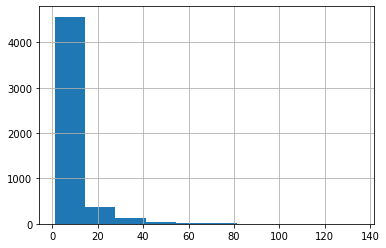

In [10]:
# unique interactions

interactions[["email", "article_id"]].drop_duplicates().groupby("email").article_id.count().hist(bins=10)

In [11]:
# Fill in the median and maximum number of user_article interactions below

median_val = interactions.groupby("email").count().median().values[0]
print(f"50% of individuals interact with {median_val} number of articles or fewer.")

max_views_by_user = interactions.groupby("email").count().max().values[0]
print(f"The maximum number of user-article interactions by any 1 user is {max_views_by_user}.")

50% of individuals interact with 3.0 number of articles or fewer.
The maximum number of user-article interactions by any 1 user is 364.


### `2.` Use the cells below to find:

**a.** The number of unique articles that have an interaction with a user.  
**b.** The number of unique articles in the dataset (whether they have any interactions or not).<br>
**c.** The number of unique users in the dataset. (excluding null values) <br>
**d.** The number of user-article interactions in the dataset.

In [12]:
unique_articles = interactions.article_id.nunique()
print(f"The number of unique articles that have at least one interaction: {unique_articles}")

total_articles = len(articles)
print(f"The number of unique articles on the IBM platform: {total_articles}")

unique_users = interactions.email.nunique()
print(f"The number of unique users: {unique_users}")

user_article_interactions = len(interactions)
print(f"The number of user-article interactions: {user_article_interactions}")

The number of unique articles that have at least one interaction: 714
The number of unique articles on the IBM platform: 1051
The number of unique users: 5148
The number of user-article interactions: 45993


### `3.` Use the cells below to find the most viewed **article_id**, as well as how often it was viewed.  After talking to the company leaders, the `email_mapper` function was deemed a reasonable way to map users to ids.  There were a small number of null values, and it was found that all of these null values likely belonged to a single user (which is how they are stored using the function below).

In [13]:
most_viewed_article_id = str(interactions.groupby("article_id").count().email.sort_values(ascending = False).index[0])
print(f"The most viewed article in the dataset as a string with one value following the decimal: {most_viewed_article_id}")

max_views = interactions.groupby("article_id").count().email.sort_values(ascending = False).values[0]
print(f"The most viewed article in the dataset was viewed how many times? {max_views}")

The most viewed article in the dataset as a string with one value following the decimal: 1429
The most viewed article in the dataset was viewed how many times? 937


In [14]:
## If you stored all your results in the variable names above, 
## you shouldn't need to change anything in this cell

sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': median_val,
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': max_views_by_user,
    '`The most viewed article in the dataset was viewed _____ times.`': max_views,
    '`The article_id of the most viewed article is ______.`': most_viewed_article_id,
    '`The number of unique articles that have at least 1 rating ______.`': unique_articles,
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles
}

# Test your dictionary against the solution
t.sol_1_test(sol_1_dict)

It looks like you have everything right here! Nice job!
